In [1]:
import SiemensQuadraProperties as sqp
import ExplorerProperties as ep
from ActivityTools import *
from SimulationDataset import *

import matplotlib.pyplot as mpl

In [2]:
# the activity calculation is usually quoted divided by the TOTAL PHANTOM VOLUME
# explorer paper says 22L for 70cm phantom, I say 22.64
# so 1e9 Bq == 44kBq/cc (or ml, since cc==ml)
# from the explorer plots, 16 kBq/cc == 0.36e9 Bq

Re-using previous simulation
347841.0 events loaded (1000000 simulated) with average 1.1461529836908242 hits/event
Simulation complete
107536.0 events loaded (1000000 simulated) with average 1.0075881565243268 hits/event


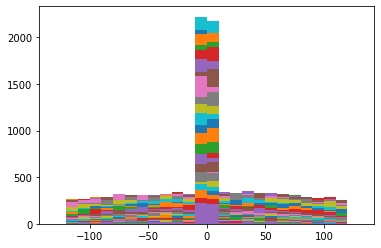

Re-using previous simulation
396061.0 events loaded (1000000 simulated) with average 1.1579201183656054 hits/event
Simulation complete
235458.0 events loaded (1000000 simulated) with average 1.0006752796677114 hits/event


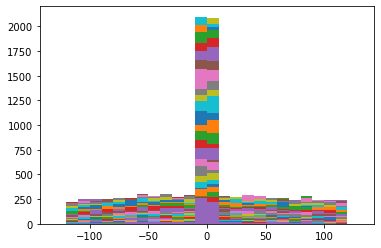

In [3]:
def NECRatTimeF18( tracerData, crystalData, crystalActivity, detectorRadius, phantomLength, simulationWindow=1E-3, coincidenceWindow=4.7E-9, zWindow=325.0 ):

    # get volume in cc
    phantomRadius = 20.3 / 2.0
    phantomVolume = phantomRadius * phantomRadius * math.pi * phantomLength / 10.0 # assume length in mm
    
    necrAtTime = []
    trueAtTime = []
    rPlusSAtTime = []
    activityAtTime = []
    for time in range( 0, 700, 20 ):
        timeSec = float(time) * 60.0
        activity = F18ActivityAtTime( 1100E6, timeSec )

        necr, true, rPlusS = DetectedCoincidences( [activity, crystalActivity], [tracerData, crystalData], simulationWindow, coincidenceWindow, detectorRadius, ZMin=-zWindow, ZMax=zWindow )
        necrAtTime.append( necr )
        trueAtTime.append( true )
        rPlusSAtTime.append( rPlusS )
        activityAtTime.append( activity / phantomVolume )
    
    return activityAtTime, necrAtTime, trueAtTime, rPlusSAtTime

tracerData = CreateDataset( 1024, "Siemens", 700, "LinearF18", 1000000, 435.0, 585.0 )
crystalData = CreateDataset( 1024, "Siemens", 1024, "Siemens", 1000000, 435.0, 585.0 )
activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, sqp.Lu176decaysInMass( sqp.DetectorMass() ), sqp.DetectorRadius(), 700.0 )
mpl.show()

tracerData = CreateDataset( 1850, "Explorer", 700, "LinearF18", 1000000, 430.0, 645.0 )
crystalData = CreateDataset( 1850, "Explorer", 1850, "Explorer", 1000000, 430.0, 645.0 )
activityAtTimeExplorer, necrAtTimeExplorer, trueAtTimeExplorer, rPlusSAtTimeExplorer= NECRatTimeF18( tracerData, crystalData, ep.Lu176decaysInMass( ep.DetectorMass() ), ep.DetectorRadius(), 700.0 )
mpl.show()

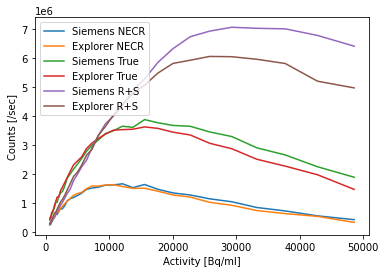

In [4]:
labels = [ "Siemens NECR", "Explorer NECR", "Siemens True", "Explorer True", "Siemens R+S", "Explorer R+S" ]
mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens, label=labels[0] )
mpl.plot( activityAtTimeExplorer, necrAtTimeExplorer, label=labels[1] )
mpl.plot( activityAtTimeSiemens, trueAtTimeSiemens, label=labels[2] )
mpl.plot( activityAtTimeExplorer, trueAtTimeExplorer, label=labels[3] )
mpl.plot( activityAtTimeSiemens, rPlusSAtTimeSiemens, label=labels[4] )
mpl.plot( activityAtTimeExplorer, rPlusSAtTimeExplorer, label=labels[5] )
mpl.legend( labels )
mpl.xlabel( "Activity [Bq/ml]")
mpl.ylabel( "Counts [/sec]")
mpl.show()

In [5]:
# Debug information about the background
print( "Siemens Quadra mass :", sqp.DetectorMass() )
print( "Siemens Quadra background (Bq) :", sqp.Lu176decaysInMass( sqp.DetectorMass() ) )
print( "Explorer mass :", ep.DetectorMass() )
print( "Explorer background (Bq) :", ep.Lu176decaysInMass( ep.DetectorMass() ) )

Siemens Quadra mass : 368574.46400000004
Siemens Quadra background (Bq) : 14726005.989989998
Explorer mass : 552590.79579648
Explorer background (Bq) : 20646468.60786598


Re-using previous simulation
17046.0 events loaded (1000000 simulated) with average 1.0039892056787516 hits/event
Simulation complete
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event


/home/ben/Software/PetScanProject/SimplePetScanner/analysis/ActivityTools.py:139: RuntimeWarning: invalid value encountered in double_scalars
  necr = true * true / histogramTotal


Re-using previous simulation
227364.0 events loaded (1000000 simulated) with average 1.0797311799581288 hits/event
Simulation complete
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
258324.0 events loaded (1000000 simulated) with average 1.0941917901549991 hits/event
Simulation complete
106675.0 events loaded (1000000 simulated) with average 1.0069744551206936 hits/event
Re-using previous simulation
284661.0 events loaded (1000000 simulated) with average 1.1098288841815351 hits/event
Simulation complete
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
306615.0 events loaded (1000000 simulated) with average 1.1242176671069581 hits/event
Simulation complete
107068.0 events loaded (1000000 simulated) with average 1.0073504688609107 hits/event
Re-using previous simulation
332115.0 events loaded (1000000 simulated) with average 1.1387501317314785 hits/event
Si

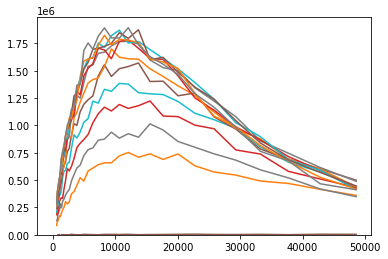

In [6]:
# Investigate ideal detector length with Siemens geometry
def PeakNECRWithLength( phantomLength, simulationWindow=1E-3, coincidenceWindow=4.7E-9, zWindow=325.0 ):
    
    detectorLengths = [ 1, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 2000 ]
    realLengths = []
    maxNECR = []
    
    for detectorLength in detectorLengths:
    
        tracerData = CreateDataset( detectorLength, "Siemens", phantomLength, "LinearF18", 1000000, 435.0, 585.0 )
        crystalData = CreateDataset( detectorLength, "Siemens", detectorLength, "Siemens", 1000000, 435.0, 585.0 )
        crystalActivity = sqp.Lu176decaysInMass( sqp.DetectorMassLength( detectorLength ) )
        
        activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, crystalActivity, sqp.DetectorRadius(), phantomLength, simulationWindow, coincidenceWindow, zWindow )
        
        mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens )
        maxNECR.append( max( necrAtTimeSiemens ) )
        realLengths.append( sqp.DetectorDiscreteLength( detectorLength ) )
        
    return realLengths, maxNECR

detectorLengths, maxNECR = PeakNECRWithLength( 700 )

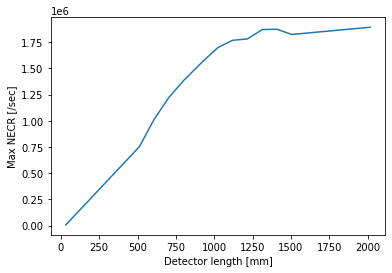

In [7]:
mpl.plot( detectorLengths, maxNECR )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Re-using previous simulation
10596.0 events loaded (1000000 simulated) with average 1.0037750094375235 hits/event
Re-using previous simulation
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event
Re-using previous simulation
147481.0 events loaded (1000000 simulated) with average 1.0568412202249782 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
172620.0 events loaded (1000000 simulated) with average 1.066209014019233 hits/event
Re-using previous simulation
106675.0 events loaded (1000000 simulated) with average 1.0069744551206936 hits/event
Re-using previous simulation
196565.0 events loaded (1000000 simulated) with average 1.0753491211558517 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
220318.0 events loaded (1000000 simulated) with average 1.08288927822

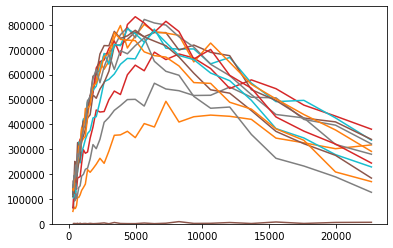

In [8]:
detectorLengths1500, maxNECR1500 = PeakNECRWithLength( 1500 )

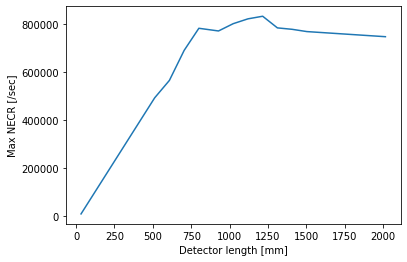

In [9]:
mpl.plot( detectorLengths1500, maxNECR1500 )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Re-using previous simulation
21529.0 events loaded (1000000 simulated) with average 1.0125412234660225 hits/event
Re-using previous simulation
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event
Re-using previous simulation
81448.0 events loaded (1000000 simulated) with average 1.0516894214713681 hits/event
Simulation complete
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
134327.0 events loaded (1000000 simulated) with average 1.089870242021336 hits/event
Simulation complete
106758.0 events loaded (1000000 simulated) with average 1.0062946102399821 hits/event
Re-using previous simulation
182369.0 events loaded (1000000 simulated) with average 1.1162587939836266 hits/event
Simulation complete
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
225177.0 events loaded (1000000 simulated) with average 1.1371809731899793 hits/event
Simulation

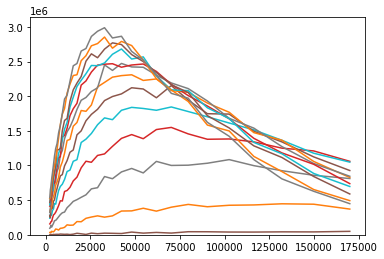

In [10]:
# Investigate ideal detector length with Siemens geometry
def PeakNECRWithLengthShort( phantomLength, simulationWindow=1E-3, coincidenceWindow=4.7E-9, zWindow=325.0 ):
    
    detectorLengths = [ 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000 ]
    realLengths = []
    maxNECR = []
    
    for detectorLength in detectorLengths:
    
        tracerData = CreateDataset( detectorLength, "Siemens", phantomLength, "LinearF18", 1000000, 435.0, 585.0 )
        crystalData = CreateDataset( detectorLength, "Siemens", detectorLength, "Siemens", 1000000, 435.0, 585.0 )
        crystalActivity = sqp.Lu176decaysInMass( sqp.DetectorMassLength( detectorLength ) )
        
        activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, crystalActivity, sqp.DetectorRadius(), phantomLength, simulationWindow, coincidenceWindow, zWindow )
        
        mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens )
        maxNECR.append( max( necrAtTimeSiemens ) )
        realLengths.append( sqp.DetectorDiscreteLength( detectorLength ) )
        
    return realLengths, maxNECR

detectorLengths200, maxNECR200 = PeakNECRWithLengthShort( 200 )

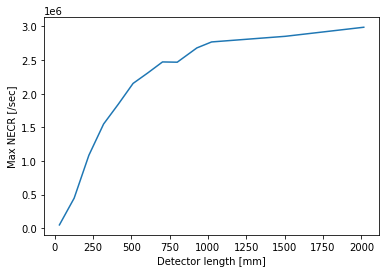

In [11]:
mpl.plot( detectorLengths200, maxNECR200 )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Re-using previous simulation
21529.0 events loaded (1000000 simulated) with average 1.0125412234660225 hits/event
Re-using previous simulation
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event
Re-using previous simulation
81448.0 events loaded (1000000 simulated) with average 1.0516894214713681 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
134327.0 events loaded (1000000 simulated) with average 1.089870242021336 hits/event
Re-using previous simulation
106758.0 events loaded (1000000 simulated) with average 1.0062946102399821 hits/event
Re-using previous simulation
182369.0 events loaded (1000000 simulated) with average 1.1162587939836266 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
225177.0 events loaded (1000000 simulated) with average 1.13718097318

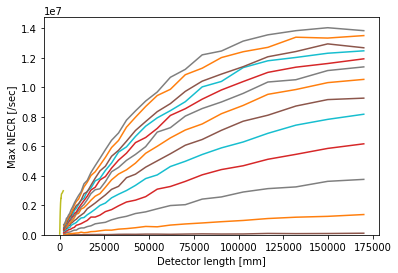

In [12]:
# try the coincidence window thing
mpl.viridis()
detectorLengths200ns, maxNECR200ns = PeakNECRWithLengthShort( 200, coincidenceWindow=1E-9 )
mpl.show()

mpl.plot( detectorLengths200, maxNECR200 )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Re-using previous simulation
17046.0 events loaded (1000000 simulated) with average 1.0039892056787516 hits/event
Re-using previous simulation
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event
Simulation complete
64789.0 events loaded (1000000 simulated) with average 1.0184290543147756 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
111350.0 events loaded (1000000 simulated) with average 1.0335339021104626 hits/event
Re-using previous simulation
106758.0 events loaded (1000000 simulated) with average 1.0062946102399821 hits/event
Simulation complete
153183.0 events loaded (1000000 simulated) with average 1.0487390898467845 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
192467.0 events loaded (1000000 simulated) with average 1.063054965266773 hits/event
Re-using previous s

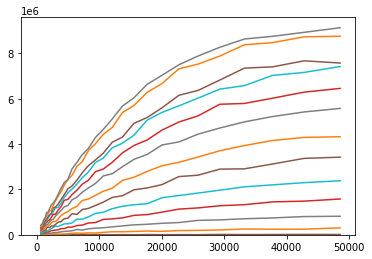

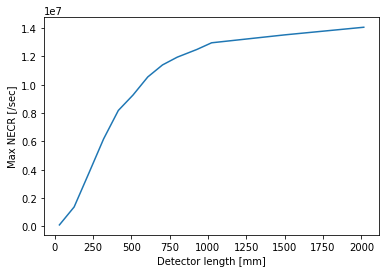

In [13]:
mpl.viridis()
detectorLengths700ns, maxNECR700ns = PeakNECRWithLengthShort( 700, coincidenceWindow=1E-9 )
mpl.show()

mpl.plot( detectorLengths700ns, maxNECR200ns )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Re-using previous simulation
10596.0 events loaded (1000000 simulated) with average 1.0037750094375235 hits/event
Re-using previous simulation
101826.0 events loaded (1000000 simulated) with average 1.0 hits/event
Re-using previous simulation
147481.0 events loaded (1000000 simulated) with average 1.0568412202249782 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
172620.0 events loaded (1000000 simulated) with average 1.066209014019233 hits/event
Re-using previous simulation
106675.0 events loaded (1000000 simulated) with average 1.0069744551206936 hits/event
Re-using previous simulation
196565.0 events loaded (1000000 simulated) with average 1.0753491211558517 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
220318.0 events loaded (1000000 simulated) with average 1.08288927822

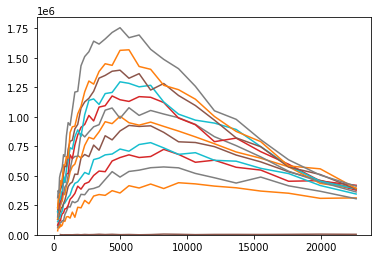

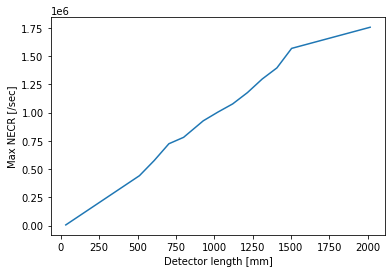

In [14]:
#fix the z window

mpl.viridis()
detectorLengths1500zwin, maxNECR1500zwin = PeakNECRWithLength( 1500, zWindow=725 )
mpl.show()

mpl.plot( detectorLengths1500zwin, maxNECR1500zwin )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()

Simulation complete
80186.0 events loaded (1000000 simulated) with average 1.0345322126056917 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
179419.0 events loaded (1000000 simulated) with average 1.0940089957027963 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
256715.0 events loaded (1000000 simulated) with average 1.1334047484564596 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
316441.0 events loaded (1000000 simulated) with average 1.1551600456325193 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
365151.0 events loaded (1000000 simulated) with average 1.167966129080846 hits/event
Re-using prev

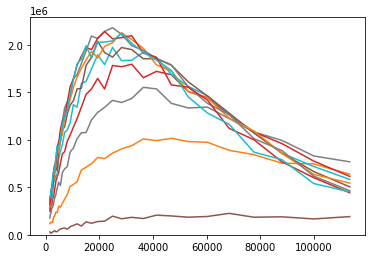

Re-using previous simulation
64789.0 events loaded (1000000 simulated) with average 1.0184290543147756 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
153183.0 events loaded (1000000 simulated) with average 1.0487390898467845 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
227364.0 events loaded (1000000 simulated) with average 1.0797311799581288 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
284661.0 events loaded (1000000 simulated) with average 1.1098288841815351 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
332115.0 events loaded (1000000 simulated) with avera

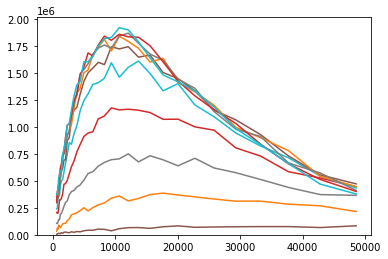

Simulation complete
50299.0 events loaded (1000000 simulated) with average 1.015069882105012 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
119681.0 events loaded (1000000 simulated) with average 1.0396804839531755 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
184942.0 events loaded (1000000 simulated) with average 1.0613651847606276 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
241450.0 events loaded (1000000 simulated) with average 1.0843777179540277 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
296657.0 events loaded (1000000 simulated) with average 1.1060753665007061 hits/event
Re-using prev

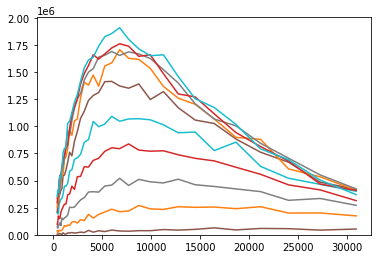

Simulation complete
39752.0 events loaded (1000000 simulated) with average 1.01423827731938 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
94938.0 events loaded (1000000 simulated) with average 1.0361077756009185 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
147481.0 events loaded (1000000 simulated) with average 1.0568412202249782 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
196565.0 events loaded (1000000 simulated) with average 1.0753491211558517 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
249675.0 events loaded (1000000 simulated) with average 1.092800640833083 

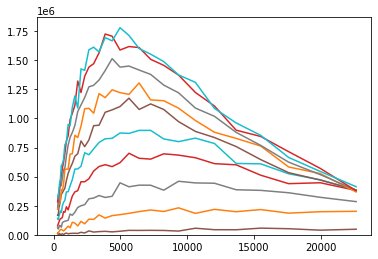

In [15]:
# Investigate ideal detector length with Siemens geometry
def PeakNECRWithLengthAndWindow( phantomLength, simulationWindow=1E-3, coincidenceWindow=4.7E-9 ):
    
    zWindow = (phantomLength - 50) / 2
    detectorLengths = [ 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900 ]
    realLengths = []
    maxNECR = []
    
    for detectorLength in detectorLengths:
    
        tracerData = CreateDataset( detectorLength, "Siemens", phantomLength, "LinearF18", 1000000, 435.0, 585.0 )
        crystalData = CreateDataset( detectorLength, "Siemens", detectorLength, "Siemens", 1000000, 435.0, 585.0 )
        crystalActivity = sqp.Lu176decaysInMass( sqp.DetectorMassLength( detectorLength ) )
        
        activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, crystalActivity, sqp.DetectorRadius(), phantomLength, simulationWindow, coincidenceWindow, zWindow )
        
        mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens )
        maxNECR.append( max( necrAtTimeSiemens ) )
        realLengths.append( sqp.DetectorDiscreteLength( detectorLength ) )
        
    return realLengths, maxNECR

mpl.viridis()
detectorLengths300zwin, maxNECR300zwin = PeakNECRWithLengthAndWindow( 300 )
mpl.show()
detectorLengths700zwin, maxNECR700zwin = PeakNECRWithLengthAndWindow( 700 )
mpl.show()
detectorLengths1100zwin, maxNECR1100zwin = PeakNECRWithLengthAndWindow( 1100 )
mpl.show()
detectorLengths1500zwin, maxNECR1500zwin = PeakNECRWithLengthAndWindow( 1500 )
mpl.show()

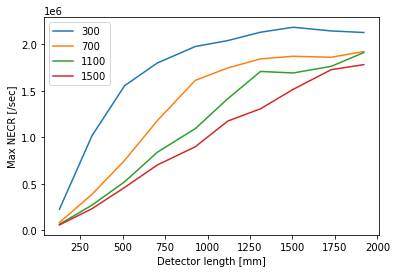

In [16]:
labels = ["300", "700", "1100", "1500"]

mpl.plot( detectorLengths300zwin, maxNECR300zwin, label=labels[0] )
mpl.plot( detectorLengths700zwin, maxNECR700zwin, label=labels[1] )
mpl.plot( detectorLengths1100zwin, maxNECR1100zwin, label=labels[2] )
mpl.plot( detectorLengths1500zwin, maxNECR1500zwin, label=labels[3] )

mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.legend( labels )
mpl.show()

Re-using previous simulation
80186.0 events loaded (1000000 simulated) with average 1.0345322126056917 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
179419.0 events loaded (1000000 simulated) with average 1.0940089957027963 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
256715.0 events loaded (1000000 simulated) with average 1.1334047484564596 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
316441.0 events loaded (1000000 simulated) with average 1.1551600456325193 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
365151.0 events loaded (1000000 simulated) with avera

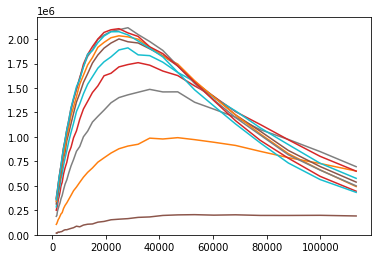

Re-using previous simulation
64789.0 events loaded (1000000 simulated) with average 1.0184290543147756 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
153183.0 events loaded (1000000 simulated) with average 1.0487390898467845 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
227364.0 events loaded (1000000 simulated) with average 1.0797311799581288 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
284661.0 events loaded (1000000 simulated) with average 1.1098288841815351 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
332115.0 events loaded (1000000 simulated) with avera

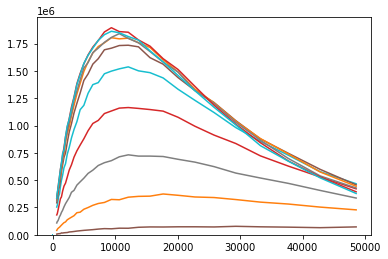

Re-using previous simulation
50299.0 events loaded (1000000 simulated) with average 1.015069882105012 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
119681.0 events loaded (1000000 simulated) with average 1.0396804839531755 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
184942.0 events loaded (1000000 simulated) with average 1.0613651847606276 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
241450.0 events loaded (1000000 simulated) with average 1.0843777179540277 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
296657.0 events loaded (1000000 simulated) with averag

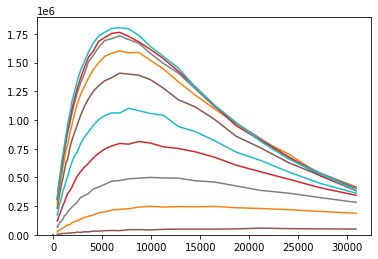

Re-using previous simulation
39752.0 events loaded (1000000 simulated) with average 1.01423827731938 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Re-using previous simulation
94938.0 events loaded (1000000 simulated) with average 1.0361077756009185 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Re-using previous simulation
147481.0 events loaded (1000000 simulated) with average 1.0568412202249782 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Re-using previous simulation
196565.0 events loaded (1000000 simulated) with average 1.0753491211558517 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Re-using previous simulation
249675.0 events loaded (1000000 simulated) with average 

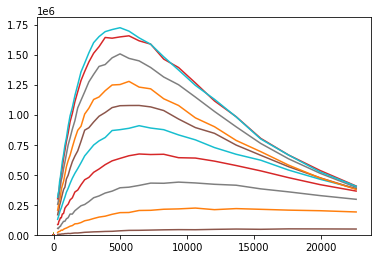

In [17]:
detectorLengths300zwin2, maxNECR300zwin2 = PeakNECRWithLengthAndWindow( 300, simulationWindow=1E-2 )
mpl.show()
detectorLengths700zwin2, maxNECR700zwin2 = PeakNECRWithLengthAndWindow( 700, simulationWindow=1E-2 )
mpl.show()
detectorLengths1100zwin2, maxNECR1100zwin2 = PeakNECRWithLengthAndWindow( 1100, simulationWindow=1E-2 )
mpl.show()
detectorLengths1500zwin2, maxNECR1500zwin2 = PeakNECRWithLengthAndWindow( 1500, simulationWindow=1E-2 )
mpl.show()

Simulation complete
80134.0 events loaded (1000000 simulated) with average 1.0860558564404623 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
187065.0 events loaded (1000000 simulated) with average 1.151113249405287 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
281258.0 events loaded (1000000 simulated) with average 1.1766669748060499 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
357437.0 events loaded (1000000 simulated) with average 1.1930354160313565 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
425036.0 events loaded (1000000 simulated) with average 1.2047473625763465 hits/event
Re-using prev

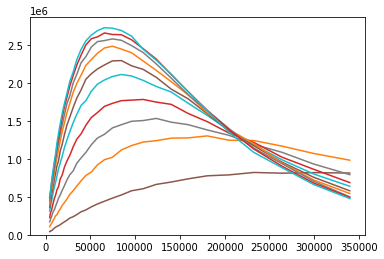

Simulation complete
73410.0 events loaded (1000000 simulated) with average 1.0227625664078464 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
169435.0 events loaded (1000000 simulated) with average 1.0605128810458289 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
244285.0 events loaded (1000000 simulated) with average 1.102175737355957 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
299686.0 events loaded (1000000 simulated) with average 1.1327456070687318 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
346885.0 events loaded (1000000 simulated) with average 1.151548784179195 hits/event
Re-using previ

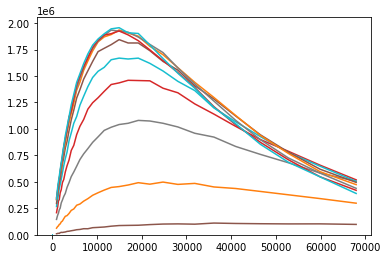

Simulation complete
57371.0 events loaded (1000000 simulated) with average 1.016924927228042 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
136446.0 events loaded (1000000 simulated) with average 1.0428228016944432 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
206529.0 events loaded (1000000 simulated) with average 1.0680969742747992 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
265340.0 events loaded (1000000 simulated) with average 1.0922589884676264 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
315396.0 events loaded (1000000 simulated) with average 1.1213553754644954 hits/event
Re-using prev

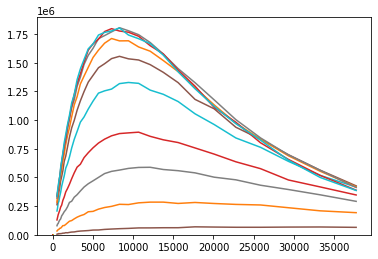

Simulation complete
44406.0 events loaded (1000000 simulated) with average 1.0138945187587263 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
106109.0 events loaded (1000000 simulated) with average 1.0374332054773865 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
164301.0 events loaded (1000000 simulated) with average 1.0592084040876197 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
218131.0 events loaded (1000000 simulated) with average 1.0779439877871555 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
273736.0 events loaded (1000000 simulated) with average 1.0973638834497472 hits/event
Re-using pre

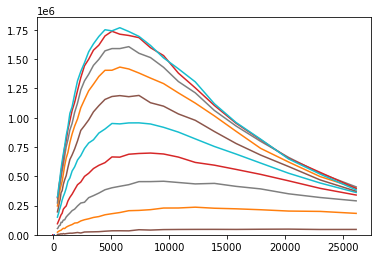

Simulation complete
35311.0 events loaded (1000000 simulated) with average 1.0143864518138823 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
85091.0 events loaded (1000000 simulated) with average 1.0355736799426496 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
133249.0 events loaded (1000000 simulated) with average 1.0555576402074311 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
177836.0 events loaded (1000000 simulated) with average 1.0739389100069727 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
227295.0 events loaded (1000000 simulated) with average 1.0909742845201171 hits/event
Re-using prev

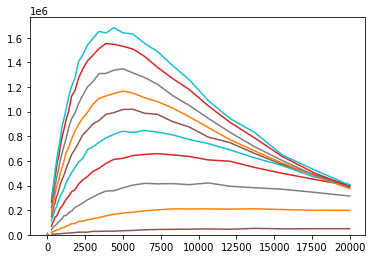

Simulation complete
32204.0 events loaded (1000000 simulated) with average 1.0140976276238975 hits/event
Re-using previous simulation
105869.0 events loaded (1000000 simulated) with average 1.0059129679131757 hits/event
Simulation complete
76764.0 events loaded (1000000 simulated) with average 1.0356938148090251 hits/event
Re-using previous simulation
107054.0 events loaded (1000000 simulated) with average 1.0067629420666206 hits/event
Simulation complete
119857.0 events loaded (1000000 simulated) with average 1.0543814712532436 hits/event
Re-using previous simulation
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
161050.0 events loaded (1000000 simulated) with average 1.0724619683328158 hits/event
Re-using previous simulation
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
207633.0 events loaded (1000000 simulated) with average 1.0883385588995969 hits/event
Re-using prev

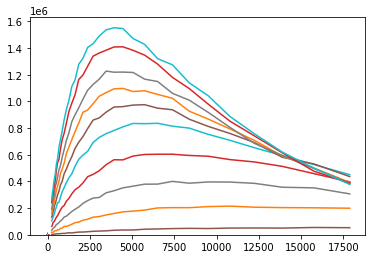

In [18]:
detectorLengths100zwin2, maxNECR100zwin2 = PeakNECRWithLengthAndWindow( 100, simulationWindow=1E-2 )
mpl.show()
detectorLengths500zwin2, maxNECR500zwin2 = PeakNECRWithLengthAndWindow( 500, simulationWindow=1E-2 )
mpl.show()
detectorLengths900zwin2, maxNECR900zwin2 = PeakNECRWithLengthAndWindow( 900, simulationWindow=1E-2 )
mpl.show()
detectorLengths1300zwin2, maxNECR1300zwin2 = PeakNECRWithLengthAndWindow( 1300, simulationWindow=1E-2 )
mpl.show()
detectorLengths1700zwin2, maxNECR1700zwin2 = PeakNECRWithLengthAndWindow( 1700, simulationWindow=1E-2 )
mpl.show()
detectorLengths1900zwin2, maxNECR1900zwin2 = PeakNECRWithLengthAndWindow( 1900, simulationWindow=1E-2 )
mpl.show()

In [21]:
outfile = open( "test.log", "w" )
outfile.write( str(detectorLengths100zwin2) + "\n" )

76

In [22]:
import csv

In [23]:
csvwriter = csv.writer( outfile, delimiter=' ' )
csvwriter.writerow( detectorLengths100zwin2 )

66

In [24]:
print( detectorLengths100zwin2 )

[128.0, 320.0, 512.0, 704.0, 928.0, 1120.0, 1312.0, 1504.0, 1728.0, 1920.0]


In [25]:
outfile.flush()

In [26]:
outfile.close()

In [29]:
print( detectorLengths100zwin2 )
print( maxNECR100zwin2 )
print( maxNECR300zwin2 )
print( maxNECR500zwin2 )
print( maxNECR700zwin2 )
print( maxNECR900zwin2 )
print( maxNECR1100zwin2 )
print( maxNECR1300zwin2 )
print( maxNECR1500zwin2 )
print( maxNECR1700zwin2 )
print( maxNECR1900zwin2 )


[128.0, 320.0, 512.0, 704.0, 928.0, 1120.0, 1312.0, 1504.0, 1728.0, 1920.0]
[822560.3124689682, 1304787.9483384907, 1535490.4482926968, 1785894.939968095, 2115349.135032538, 2299033.313270353, 2488360.5054598963, 2584888.3316404265, 2662984.9655032977, 2732311.359720315]
[205803.91557204453, 992550.134784345, 1486317.155562255, 1759049.4429998228, 1910352.5736898333, 2001395.3966760738, 2033506.1358518887, 2116129.6906195115, 2106314.9114720747, 2075570.4005791508]
[110842.49363867684, 498165.7162806936, 1080806.8520226644, 1459625.6217541834, 1669254.371942882, 1843775.368817481, 1934939.9485017478, 1934055.4496875796, 1925643.7426916305, 1956473.5081043753]
[77730.02808645745, 373534.19120725745, 731891.9859869007, 1164641.5394285014, 1536890.602431199, 1734910.3432052596, 1803659.4677570537, 1840914.9559717225, 1895225.8565952233, 1862776.801816757]
[69529.30113052415, 284762.55232535815, 588534.1513124035, 894506.0898006768, 1327727.5073456732, 1555589.6200429644, 1710936.062713128